# A/B Testing of Fast Food Promotion Effectiveness

## Project Introduction

In the competitive fast food market, promotions play a crucial role in attracting customers and increasing sales. To evaluate the effectiveness of different promotions, this project implements an A/B test analysis using sales data from a fast food chain. The main objective is to determine which of the three promotions (Promotion 1, Promotion 2, and Promotion 3) is the most effective in increasing sales.

### Specific Objectives:

1. **Exploratory Data Analysis (EDA)**: Perform an exploratory data analysis to better understand the distribution of sales and the relationship between store characteristics and promotions.
2. **ANOVA and Tukey Test**: Apply an analysis of variance (ANOVA) to identify significant differences in sales between promotions, followed by a Tukey test to compare all promotions with each other.
3. **Resampling (Bootstrap)**: Use bootstrap techniques to generate multiple samples from the original dataset and assess the variability of the estimates.
4. **Visualization and Conclusions**: Visualize the results of the analysis and simulations through confidence interval plots, and provide recommendations based on the findings.

### Project Importance:

This project is essential for decision-making in the management of promotions for the fast food chain. By identifying the most effective promotion, the company can optimize its marketing strategies and maximize its revenue. Additionally, the use of robust statistical techniques and simulations provides a solid foundation for the conclusions and recommendations presented.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
df = pd.read_csv(r"WA_Marketing-Campaign.csv")
df.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


## Description of Variables

In [3]:
# Basic description of the dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB
None


In [4]:
# Descriptive statistics of numerical variables
print(df.describe())

         MarketID  LocationID  AgeOfStore   Promotion        week  \
count  548.000000  548.000000  548.000000  548.000000  548.000000   
mean     5.715328  479.656934    8.503650    2.029197    2.500000   
std      2.877001  287.973679    6.638345    0.810729    1.119055   
min      1.000000    1.000000    1.000000    1.000000    1.000000   
25%      3.000000  216.000000    4.000000    1.000000    1.750000   
50%      6.000000  504.000000    7.000000    2.000000    2.500000   
75%      8.000000  708.000000   12.000000    3.000000    3.250000   
max     10.000000  920.000000   28.000000    3.000000    4.000000   

       SalesInThousands  
count        548.000000  
mean          53.466204  
std           16.755216  
min           17.340000  
25%           42.545000  
50%           50.200000  
75%           60.477500  
max           99.650000  


In [5]:
# Check for null values
print(df.isnull().sum())

MarketID            0
MarketSize          0
LocationID          0
AgeOfStore          0
Promotion           0
week                0
SalesInThousands    0
dtype: int64


In [6]:
# Check for duplicate values
print(df.duplicated().sum())

0


## EDA - Exploratory Data Analysis

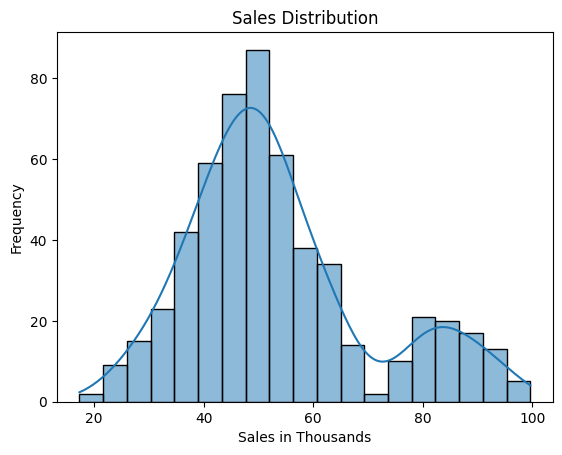

In [7]:
# Sales Histogram
sns.histplot(df['SalesInThousands'], kde=True)
plt.title('Sales Distribution')
plt.xlabel('Sales in Thousands')
plt.ylabel('Frequency')
plt.show()

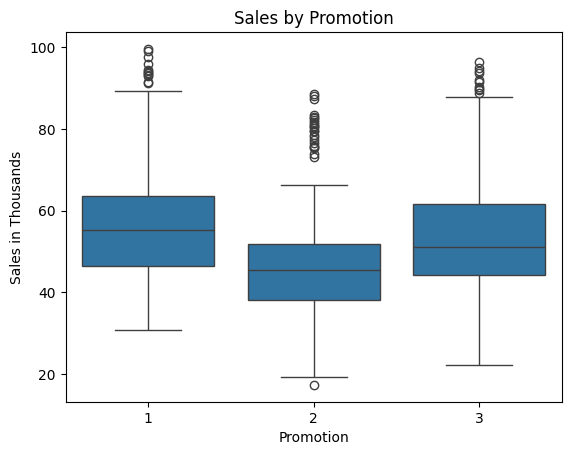

In [8]:
# Sales Boxplot by Promotion
sns.boxplot(x='Promotion', y='SalesInThousands', data=df)
plt.title('Sales by Promotion')
plt.xlabel('Promotion')
plt.ylabel('Sales in Thousands')
plt.show()

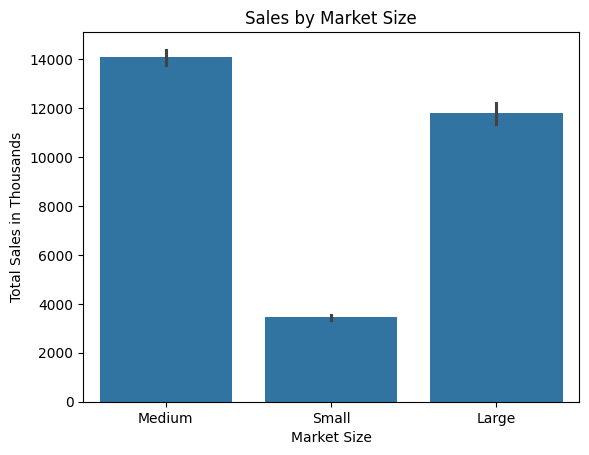

In [9]:
# Bar Chart of Sales by Market Size
sns.barplot(x='MarketSize', y='SalesInThousands', data=df, estimator=sum)
plt.title('Sales by Market Size')
plt.xlabel('Market Size')
plt.ylabel('Total Sales in Thousands')
plt.show()

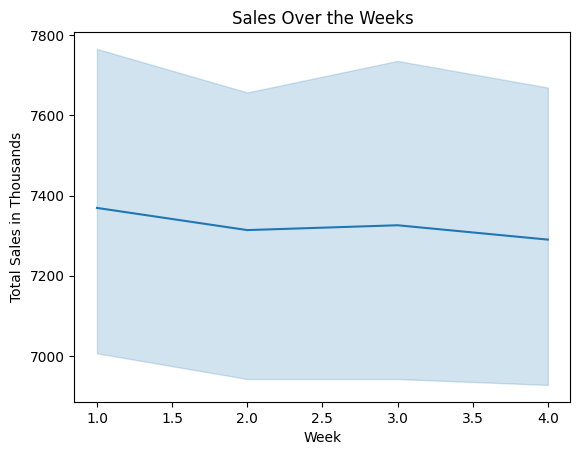

In [10]:
# Line Chart of Sales by Week
sns.lineplot(x='week', y='SalesInThousands', data=df, estimator=sum)
plt.title('Sales Over the Weeks')
plt.xlabel('Week')
plt.ylabel('Total Sales in Thousands')
plt.show()

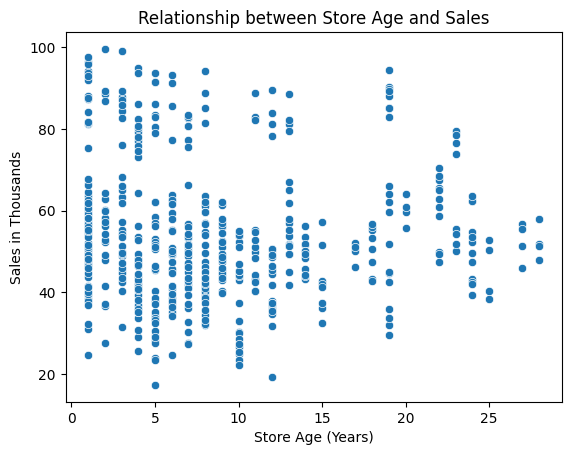

In [11]:
# Scatter Plot of Store Age and Sales
sns.scatterplot(x='AgeOfStore', y='SalesInThousands', data=df)
plt.title('Relationship between Store Age and Sales')
plt.xlabel('Store Age (Years)')
plt.ylabel('Sales in Thousands')
plt.show()

1. **Sales Distribution**: The histogram shows that sales are normally distributed with a peak around 60 thousand.
2. **Relationship between Store Age and Sales**: The scatter plot indicates that there is no clear correlation between store age and sales.
3. **Sales by Promotion**: The boxplot suggests that Promotion 3 might be the most effective, with a higher median sales.
4. **Sales by Market Size**: Medium markets have the highest sales, followed by large markets.
5. **Sales Over the Weeks**: Sales appear to be relatively constant over the weeks.

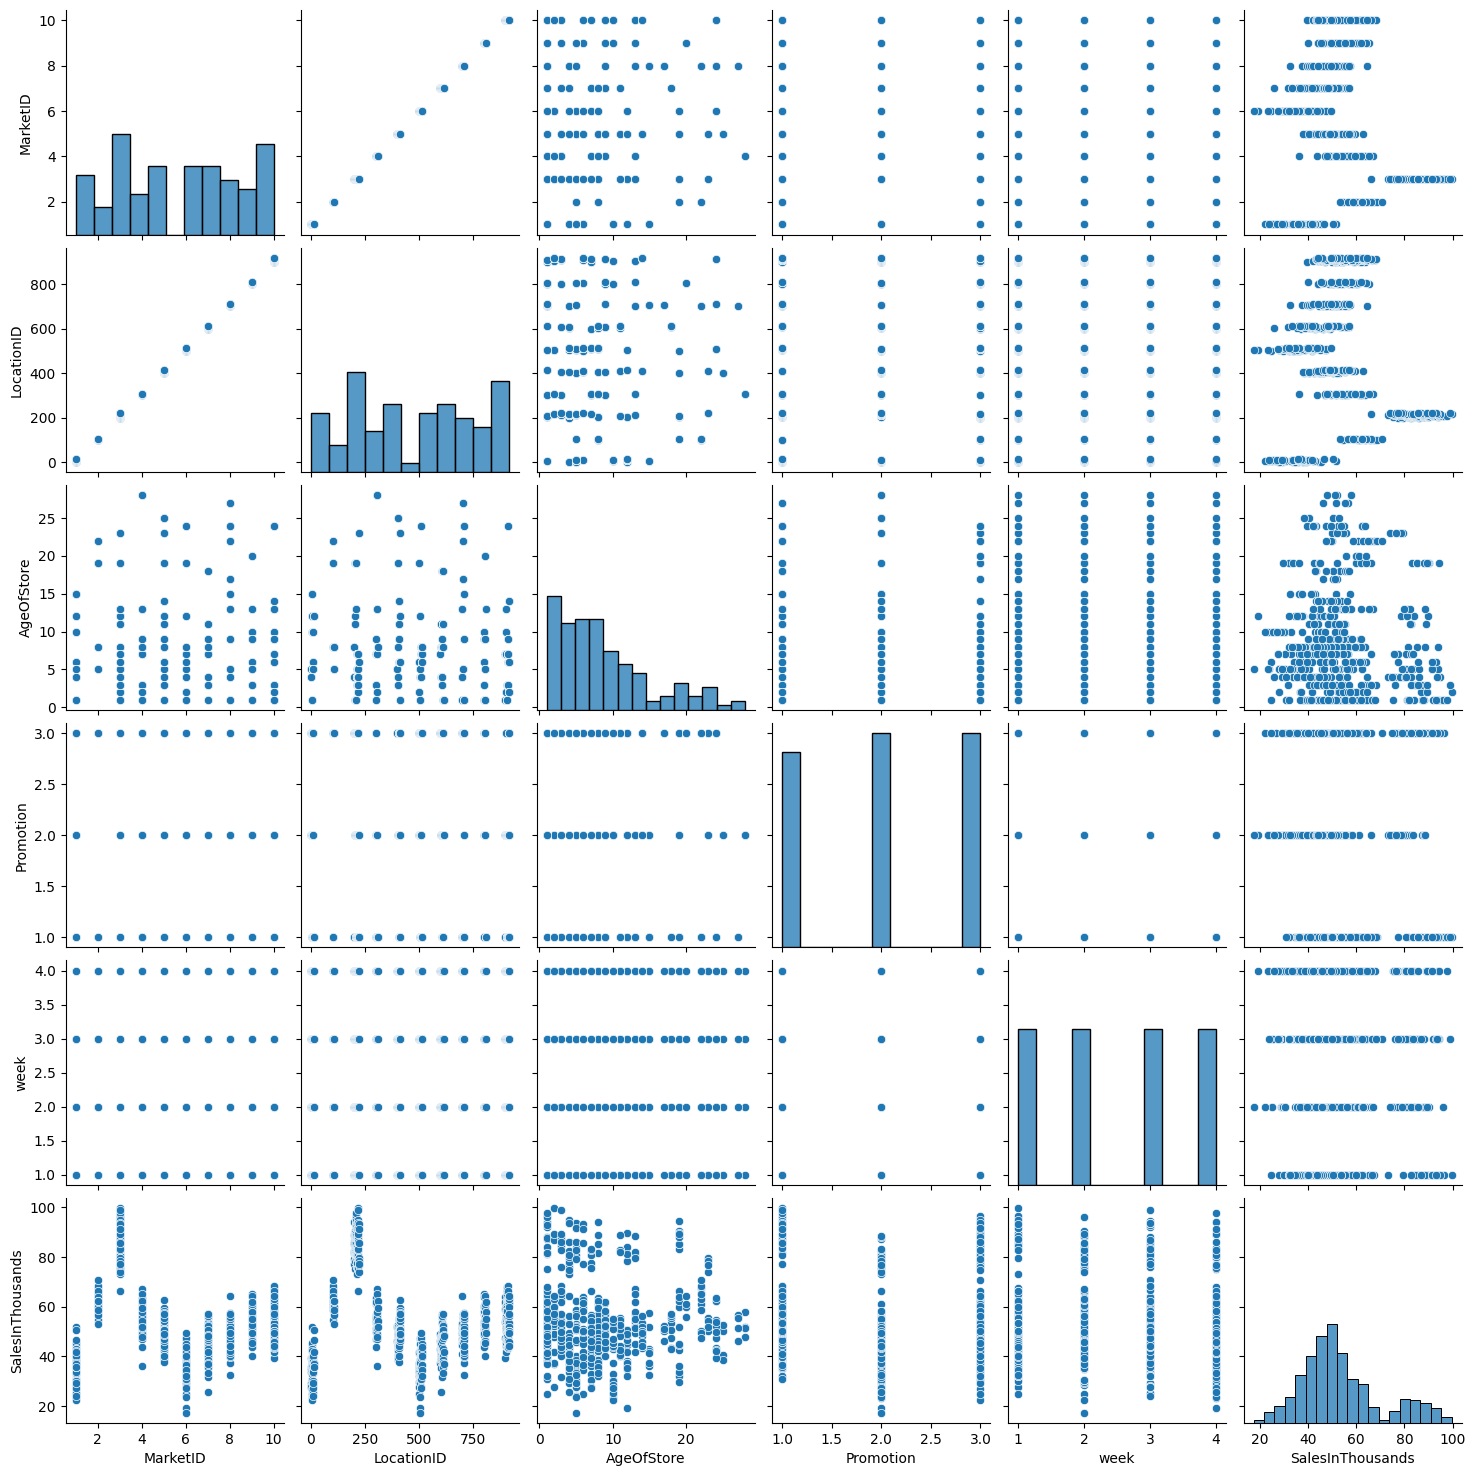

In [12]:
#Identification of Patterns and Anomalies
sns.pairplot(df)
plt.show()

## ANOVA (Analysis of Variance)
To determine if there are significant differences between the mean sales of different promotion groups.
### Interpretation of Results
- **F-statistic:** A high value indicates that there is significant variability between groups compared to the variability within groups.
- **p-value:** If it is less than the significance level (e.g., 0.05), we reject the null hypothesis that the group means are equal.

In [13]:
#Perform the ANOVA test
anova_result = stats.f_oneway(
    df[df['Promotion'] == 1]['SalesInThousands'],
    df[df['Promotion'] == 2]['SalesInThousands'],
    df[df['Promotion'] == 3]['SalesInThousands']
)

# Show the results
print('F-statistic:', anova_result.statistic)
print('p-value:', anova_result.pvalue)

# Perform Tukey's test
tukey_result = pairwise_tukeyhsd(endog=df['SalesInThousands'], groups=df['Promotion'], alpha=0.05)

# Show the results
print(tukey_result)

F-statistic: 21.953485793080677
p-value: 6.765849261408714e-10
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2 -10.7696    0.0 -14.7738 -6.7654   True
     1      3  -2.7345 0.2444  -6.7388  1.2697  False
     2      3   8.0351    0.0   4.1208 11.9493   True
-----------------------------------------------------


## Interpretation:
- **High F-statistic:** Indicates that there is significant variability between promotion groups compared to the variability within the groups.
- **Very low p-value:** Being much less than 0.05, we can reject the null hypothesis. This suggests that there are significant differences in mean sales among the different promotions.

This implies that at least one of the promotions has a significantly different impact on sales. To identify which promotion(s) differ, we can perform a post-hoc test, such as Tukey's test.

## The results of the Tukey test indicate the following:

- **Promotion 1 vs. Promotion 2**: There is a significant difference in sales, with Promotion 1 having an average of $10.77 thousand less in sales than Promotion 2 (p-value = 0.0).

- **Promotion 1 vs. Promotion 3**: There is no significant difference in sales (p-value = 0.2444).

- **Promotion 2 vs. Promotion 3**: There is a significant difference in sales, with Promotion 2 having an average of $8.04 thousand more in sales than Promotion 3 (p-value = 0.0).

## Conclusions:
- Promotion 2 is significantly more effective than Promotions 1 and 3.
- There is no significant difference between Promotions 1 and 3.

This suggests that Promotion 2 is the most effective at increasing sales.

In [14]:
resampling = df.copy()

Bootstrap ANOVA Mean: 23.367407308635205
Bootstrap ANOVA 95% CI: [11.60818647 38.59891518]


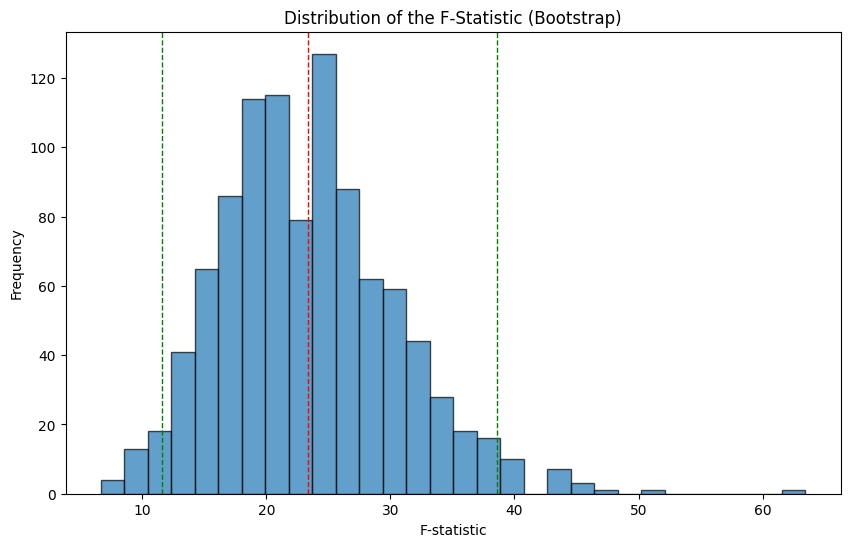

In [15]:
# Parameters for the Bootstrap
bootstrap_samples = 1000
bootstrap_results = []

# Perform the Bootstrap
np.random.seed(42)  # For Reproducibility
for _ in range(bootstrap_samples):
    # Random Sample with Replacement from the Original Dataset
    bootstrap_sample = resampling.sample(frac=1, replace=True)
    
    # Perform ANOVA on the Bootstrap Sample
    anova_result = stats.f_oneway(
        bootstrap_sample[bootstrap_sample['Promotion'] == 1]['SalesInThousands'],
        bootstrap_sample[bootstrap_sample['Promotion'] == 2]['SalesInThousands'],
        bootstrap_sample[bootstrap_sample['Promotion'] == 3]['SalesInThousands']
    )
    
    # Store the F-Statistic Result
    bootstrap_results.append(anova_result.statistic)

bootstrap_results = np.array(bootstrap_results)

# Summary of the Bootstrap Results
bootstrap_mean = bootstrap_results.mean()
bootstrap_ci = np.percentile(bootstrap_results, [2.5, 97.5])

print('Bootstrap ANOVA Mean:', bootstrap_mean)
print('Bootstrap ANOVA 95% CI:', bootstrap_ci)

# Histogram of the Bootstrap Results
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_results, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(bootstrap_mean, color='r', linestyle='dashed', linewidth=1)
plt.axvline(bootstrap_ci[0], color='g', linestyle='dashed', linewidth=1)
plt.axvline(bootstrap_ci[1], color='g', linestyle='dashed', linewidth=1)
plt.title('Distribution of the F-Statistic (Bootstrap)')
plt.xlabel('F-statistic')
plt.ylabel('Frequency')
plt.show()

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2 -10.7696    0.0 -14.7738 -6.7654   True
     1      3  -2.7345 0.2444  -6.7388  1.2697  False
     2      3   8.0351    0.0   4.1208 11.9493   True
-----------------------------------------------------


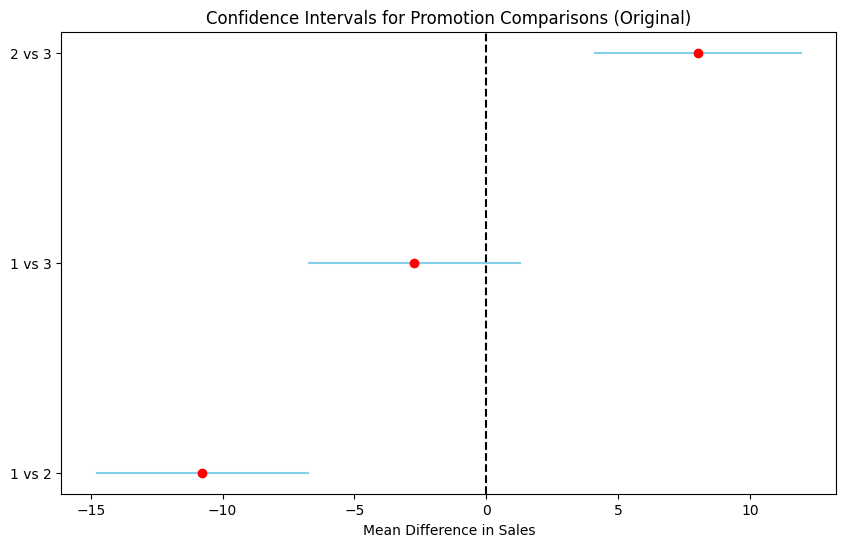

In [16]:
# Perform Tukey's test on the original dataset to compare
tukey_result = pairwise_tukeyhsd(endog=resampling['SalesInThousands'], groups=resampling['Promotion'], alpha=0.05)
print(tukey_result)

# Extract the results of Tukey's test into a DataFrame
tukey_df = pd.DataFrame(data=tukey_result._results_table.data[1:], columns=tukey_result._results_table.data[0])

# Convert the values of the 'group1' and 'group2' columns to strings
tukey_df['group1'] = tukey_df['group1'].astype(str)
tukey_df['group2'] = tukey_df['group2'].astype(str)

# Convert the numerical columns to float type
tukey_df['meandiff'] = tukey_df['meandiff'].astype(float)
tukey_df['lower'] = tukey_df['lower'].astype(float)
tukey_df['upper'] = tukey_df['upper'].astype(float)

# Correctly concatenate text values
comparison_labels = tukey_df['group1'] + ' vs ' + tukey_df['group2']

# Confidence interval plot of Tukey's test
plt.figure(figsize=(10, 6))
for i in range(len(tukey_df)):
    plt.plot([tukey_df['lower'][i], tukey_df['upper'][i]], [i, i], color='skyblue')
    plt.plot(tukey_df['meandiff'][i], i, 'ro')
plt.yticks(range(len(tukey_df)), comparison_labels)
plt.axvline(0, color='black', linestyle='--')
plt.title('Confidence Intervals for Promotion Comparisons (Original)')
plt.xlabel('Mean Difference in Sales')
plt.show()

### Analysis of Bootstrap Results

#### Summary of the Histogram of the F-Statistic (Bootstrap):
- **Bootstrap ANOVA Mean**: 23.37
- **Bootstrap ANOVA 95% CI**: [11.61, 38.60]
  - **Interpretation**: The mean F-statistic is 23.37, and the 95% confidence interval suggests that the true value of the F-statistic is between 11.61 and 38.60. This indicates significant variability in the F-statistic across bootstrap samples, but overall there is a significant difference between promotions.

#### Tukey Test Results on the Original Dataset:
- **Promotion 1 vs. Promotion 2**:
  - **Mean Difference**: -10.77
  - **Confidence Interval**: [-14.77, -6.77]
  - **Adjusted p-value**: 0.0
  - **Conclusion**: There is a significant difference in sales, with Promotion 2 being superior to Promotion 1.

- **Promotion 1 vs. Promotion 3**:
  - **Mean Difference**: -2.73
  - **Confidence Interval**: [-6.74, 1.27]
  - **Adjusted p-value**: 0.2444
  - **Conclusion**: There is no significant difference in sales between Promotion 1 and Promotion 3.

- **Promotion 2 vs. Promotion 3**:
  - **Mean Difference**: 8.04
  - **Confidence Interval**: [4.12, 11.95]
  - **Adjusted p-value**: 0.0
  - **Conclusion**: There is a significant difference in sales, with Promotion 2 being superior to Promotion 3.

### Conclusions:
1. **Bootstrap**: The bootstrap results confirm the variability in the F-statistic and provide a confidence interval that supports the significance of the observed differences.
2. **Tukey Test**: The results of the Tukey test on the original dataset suggest that **Promotion 2** is significantly more effective than **Promotion 1** and **Promotion 3**.
3. **Promotion 1 vs. Promotion 3**: There is no significant difference in sales between **Promotion 1** and **Promotion 3**.

### Recommendations:
- **Implementation of Promotion 2**: Given that Promotion 2 has proven to be significantly more effective than the other promotions, its implementation is recommended to maximize sales.